In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\Data_Science_Jupyter_Files\Historical_Wildfires.csv")

In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
df.shape

(26406, 10)

In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [7]:
import datetime as dt
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df["Year"] = pd.to_datetime(df["Date"]).dt.year

In [8]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Month                                    int32
Year                                     int32
dtype: object

### TASK 1.1: Let's try to understand the change in average estimated fire area over time (use pandas to plot)

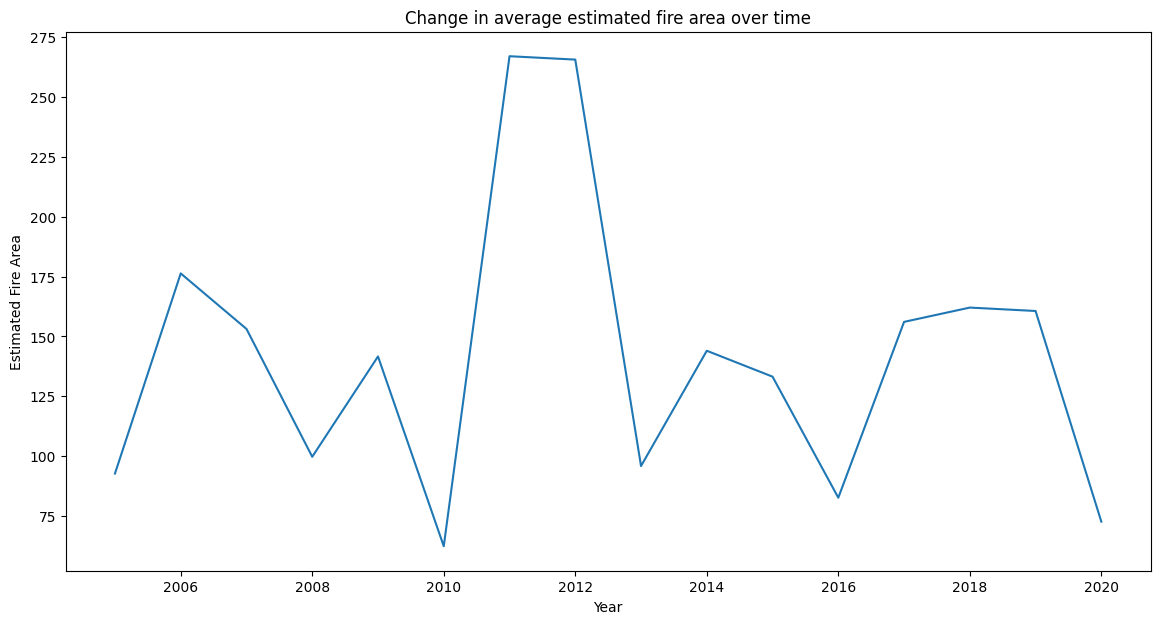

In [12]:
plt.figure(figsize=(14, 7))
df_new = df.groupby("Year")["Estimated_fire_area"].mean()

df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel("Year")
plt.ylabel("Estimated Fire Area")
plt.title("Change in average estimated fire area over time")
plt.show()

### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

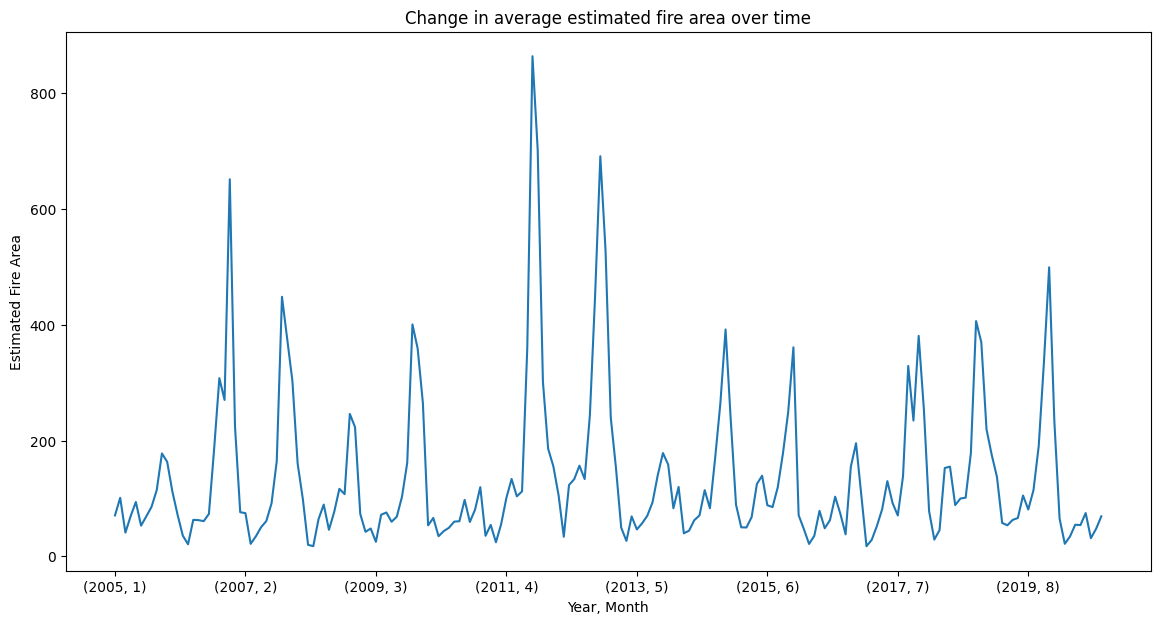

In [15]:
plt.figure(figsize=(14, 7))
df_new = df.groupby(["Year", "Month"])["Estimated_fire_area"].mean()

df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel("Year, Month")
plt.ylabel("Estimated Fire Area")
plt.title("Change in average estimated fire area over time")
plt.show()

### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions, use the functionality of seaborn to develop a barplot

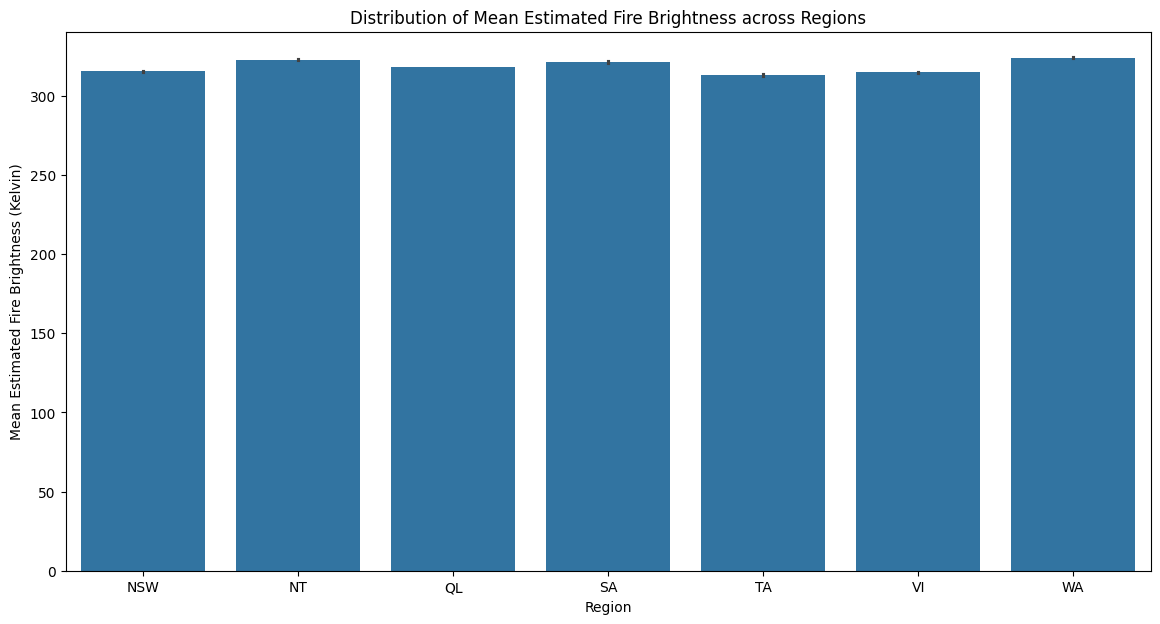

In [16]:
plt.figure(figsize=(14, 7))

sns.barplot(data=df, x="Region", y="Mean_estimated_fire_brightness")
plt.xlabel("Region")
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions, we will develop a pie chart for this

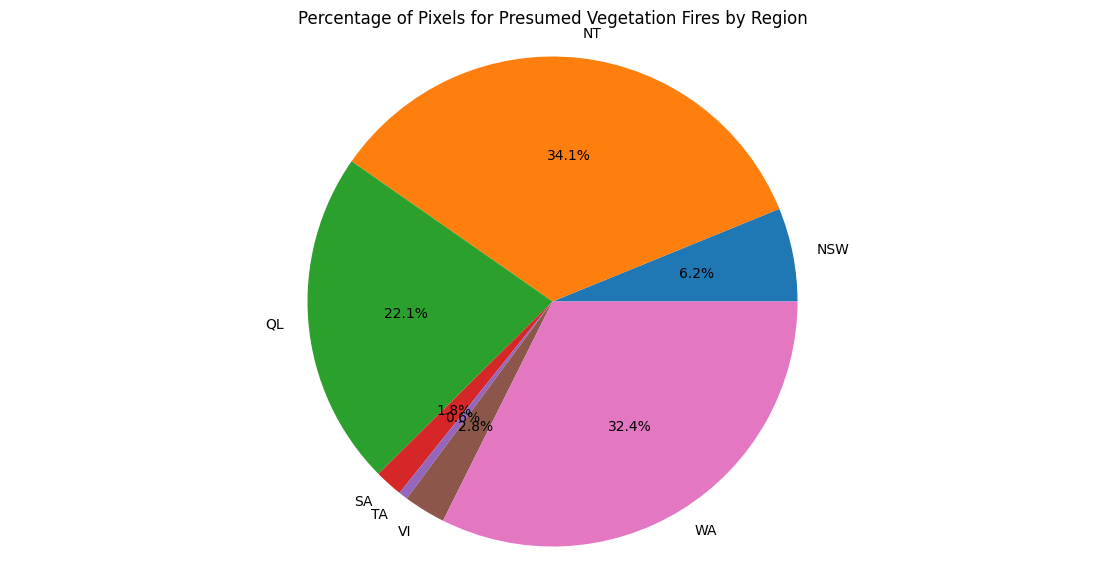

In [17]:
plt.figure(figsize=(14,7))
region_counts = df.groupby("Region")["Count"].sum()

plt.pie(region_counts, labels=region_counts.index, autopct="%1.1f%%")
plt.title("Percentage of Pixels for Presumed Vegetation Fires by Region")
plt.axis("equal")
plt.show()

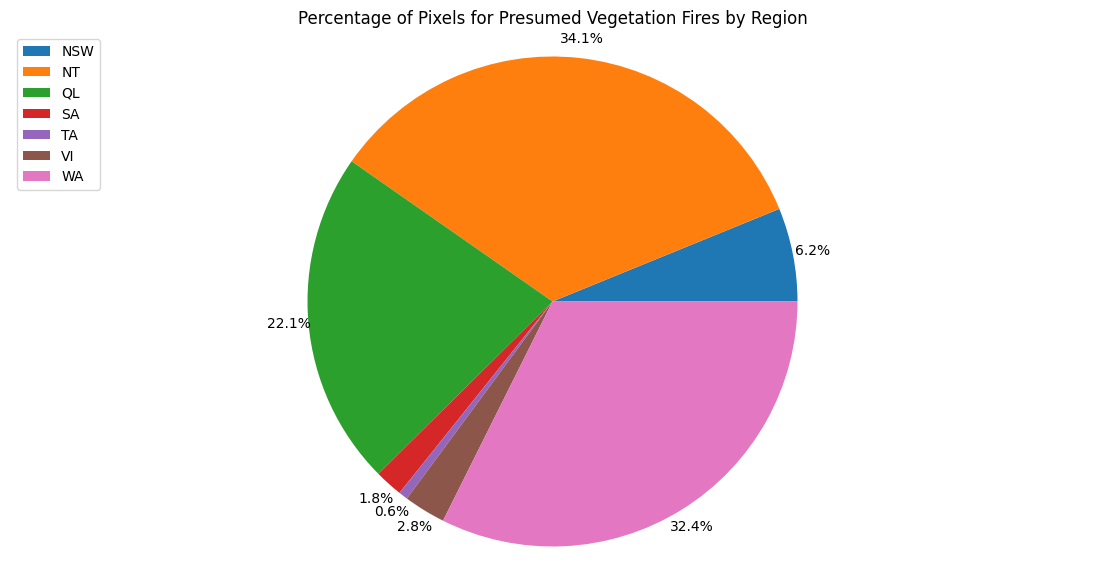

In [21]:
plt.figure(figsize=(14,7))
region_counts = df.groupby("Region")["Count"].sum()

plt.pie(region_counts, labels=None, autopct="%1.1f%%", pctdistance=1.08)
plt.title("Percentage of Pixels for Presumed Vegetation Fires by Region")
plt.axis("equal")
plt.legend(labels=region_counts.index, loc="upper left")
plt.show()

### TASK 1.5: Let's try to develop a histogram of the mean estimated fire brightness Using Matplotlib to create the histogram

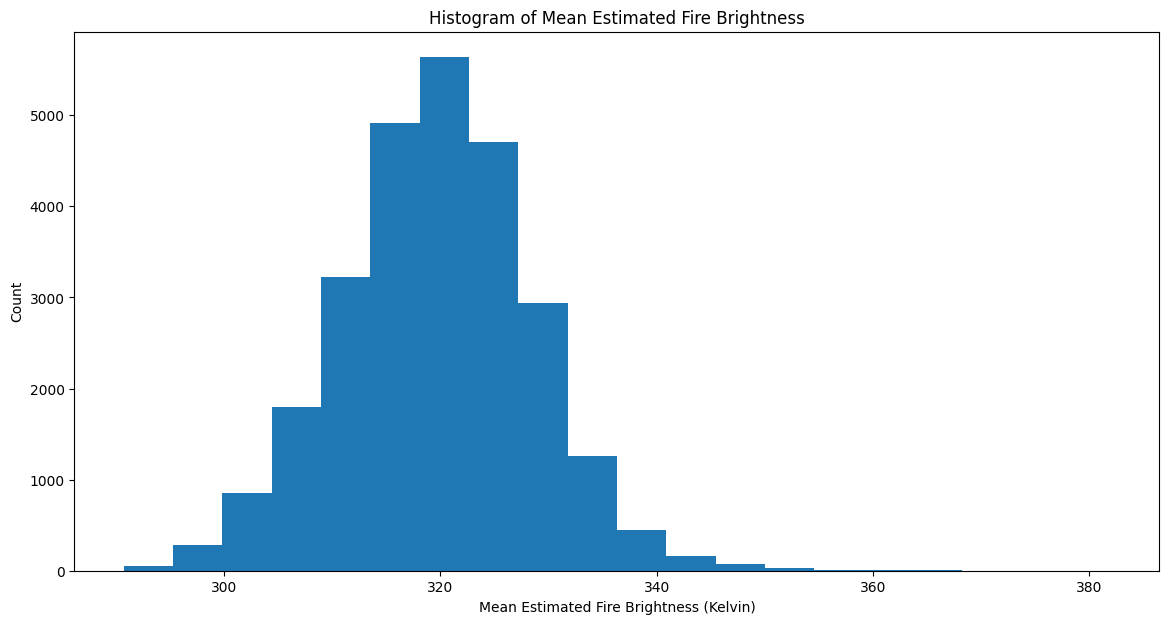

In [22]:
plt.figure(figsize=(14,7))
plt.hist(x=df["Mean_estimated_fire_brightness"], bins=20)
plt.xlabel("Mean Estimated Fire Brightness (Kelvin)")
plt.ylabel("Count")
plt.title("Histogram of Mean Estimated Fire Brightness")
plt.show()

### TASK 1.6: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue

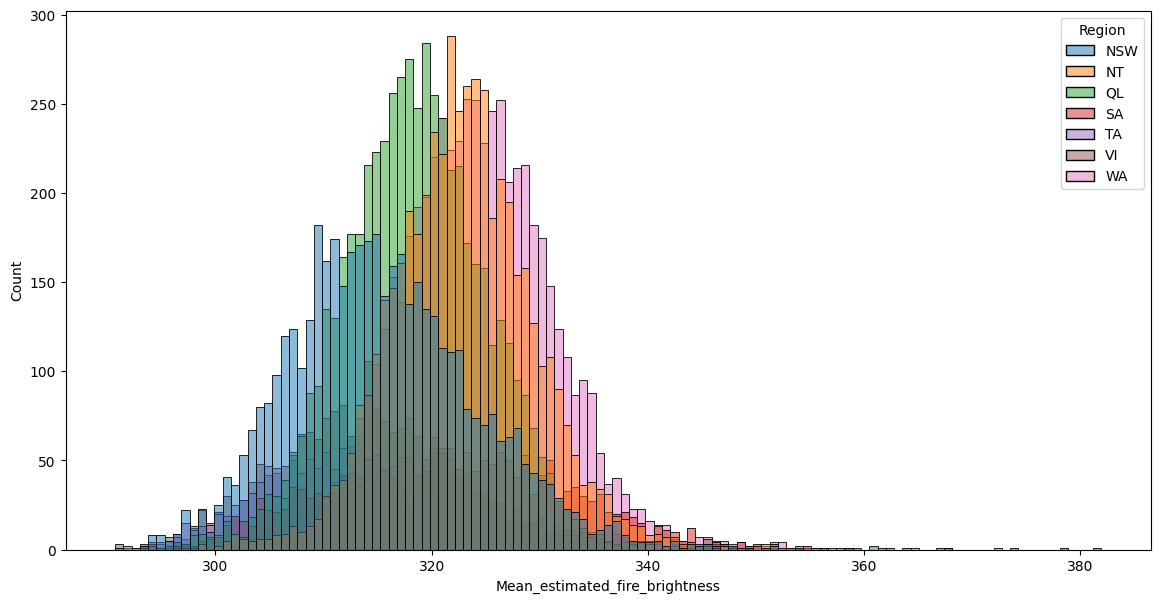

In [25]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue="Region")
plt.show()

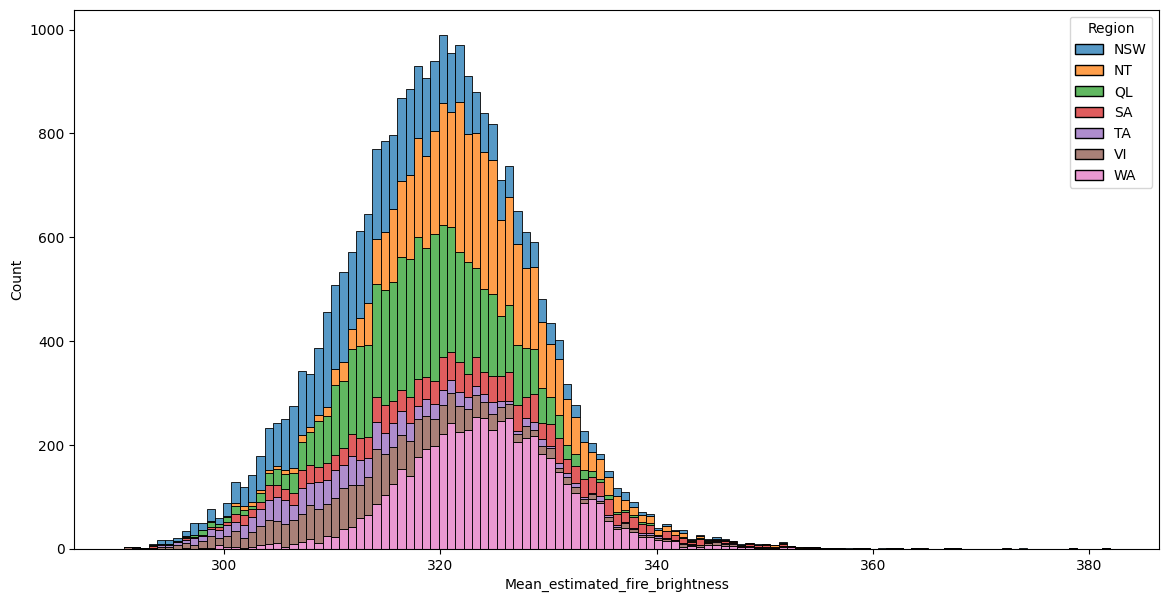

In [26]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue="Region", multiple="stack")
plt.show()

### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?

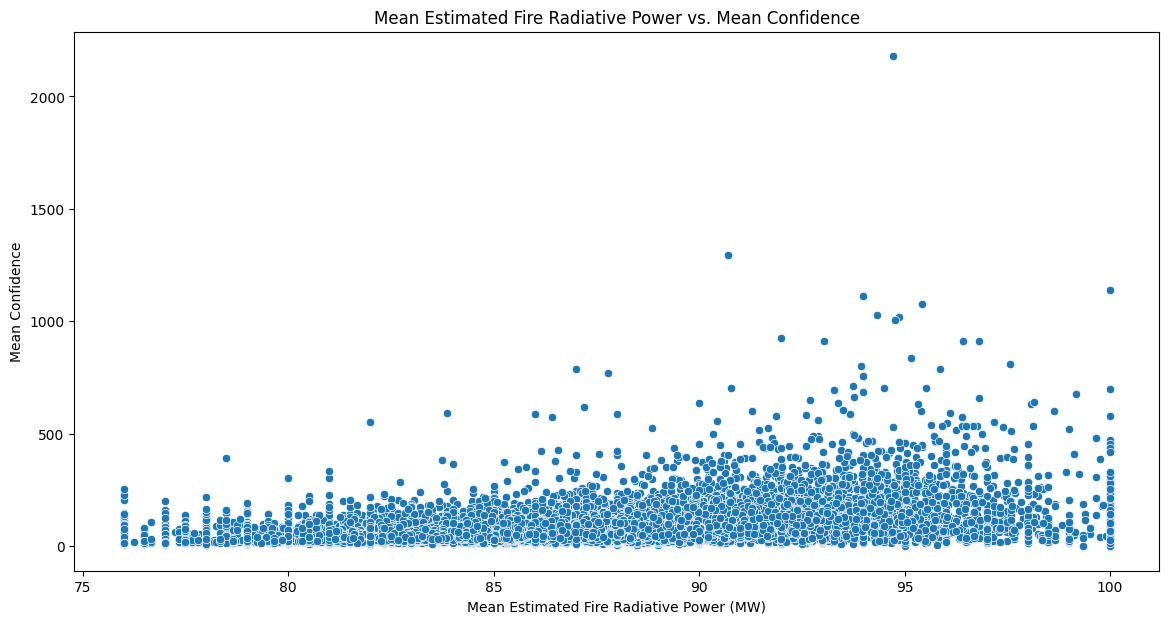

In [31]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x="Mean_confidence", y="Mean_estimated_fire_radiative_power")
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

### TASK 1.8: Let's mark these seven regions on the Map of Australia using Folium

In [32]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [41]:
from folium import plugins
from folium.plugins import MarkerCluster
latitude = -25
longitude = 135
aus_map = folium.Map(location=[latitude, longitude], zoom_start=4)
loc= plugins.MarkerCluster().add_to(aus_map)
for lat, lng, label in zip(reg.Lat, reg.Lon, reg.region):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(loc)

aus_map